                Capstone Project - Predict Credit Card Consumption of Customer for Leading Bank

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
df_demo = pd.read_excel("C:/Users/91971/Downloads/15647NeonBand.RarZipExtractorPro_g3b9h1p9bdemw!App/Rar Zip Extractor Pro/11. Capstone Case Study - Predict Cred Card Consumption/CustomerDemographics.xlsx")
df_demo

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [354]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [355]:
df_behave = pd.read_excel("C:/Users/91971/Downloads/15647NeonBand.RarZipExtractorPro_g3b9h1p9bdemw!App/Rar Zip Extractor Pro/11. Capstone Case Study - Predict Cred Card Consumption/CustomerBehaviorData.xlsx")
df_behave

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [356]:
df_demo_behave = df_demo.merge(df_behave,left_on="ID",right_on="ID")
df_demo_behave

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,0,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,47,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,2,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,3,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91


In [357]:
df_consumption = pd.read_excel("C:/Users/91971/Downloads/15647NeonBand.RarZipExtractorPro_g3b9h1p9bdemw!App/Rar Zip Extractor Pro/11. Capstone Case Study - Predict Cred Card Consumption/CreditConsumptionData.xlsx")
df_consumption

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [358]:
df_demo_behave_consumption = df_demo_behave.merge(df_consumption,left_on="ID",right_on="ID")
df_demo_behave_consumption

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [359]:
new = df_demo_behave_consumption[df_demo_behave_consumption.cc_cons.isna()]
existing = df_demo_behave_consumption[-df_demo_behave_consumption.cc_cons.isna()]

In [360]:
existing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   account_type                  15000 non-null  object 
 2   gender                        15000 non-null  object 
 3   age                           15000 non-null  int64  
 4   Income                        15000 non-null  object 
 5   Emp_Tenure_Years              15000 non-null  float64
 6   Tenure_with_Bank              15000 non-null  int64  
 7   region_code                   15000 non-null  float64
 8   NetBanking_Flag               15000 non-null  int64  
 9   Avg_days_between_transaction  14999 non-null  float64
 10  cc_cons_apr                   15000 non-null  float64
 11  dc_cons_apr                   15000 non-null  float64
 12  cc_cons_may                   15000 non-null  float64
 13 

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

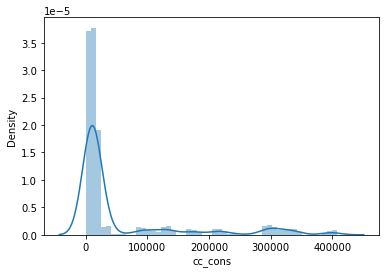

In [361]:
sns.distplot(existing.cc_cons)

In [362]:
import pandas_profiling as pf

In [363]:
#report = pf.ProfileReport(existing)
#report

In [364]:
#report.to_file('credit_cons_report.html')

In [365]:
#dropping constant,unique,skewed and fields having high correlation
existing_new=existing.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq','dc_cons_may',
                           'credit_amount_apr','max_credit_amount_apr','credit_amount_may','max_credit_amount_may','max_credit_amount_jun','ID'],axis=1)

In [366]:
existing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  15000 non-null  object 
 1   gender                        15000 non-null  object 
 2   age                           15000 non-null  int64  
 3   Income                        15000 non-null  object 
 4   Emp_Tenure_Years              15000 non-null  float64
 5   Tenure_with_Bank              15000 non-null  int64  
 6   region_code                   15000 non-null  float64
 7   NetBanking_Flag               15000 non-null  int64  
 8   Avg_days_between_transaction  14999 non-null  float64
 9   cc_cons_apr                   15000 non-null  float64
 10  dc_cons_apr                   15000 non-null  float64
 11  cc_cons_may                   15000 non-null  float64
 12  cc_cons_jun                   15000 non-null  float64
 13 

In [367]:
def missing_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        x = x.fillna(x.median())
    elif ((x.dtype=="object") or (x.dtype == "O")):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x 

In [368]:
existing_new=existing_new.apply(missing_var)

In [369]:
existing_new.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
debit_count_apr                 0
credit_count_apr                0
debit_amount_may                0
credit_count_m

In [370]:
#performing capping and flooring
def outlier_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        x = x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99))
    else:
        x
    return x  

In [371]:
existing_new=existing_new.apply(outlier_var)
existing_new

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,credit_count_apr,debit_amount_may,credit_count_may,debit_count_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,emi_active,cc_cons
111,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,...,6,11527.50,2,40,30051.32,12761.00,2,65,1674.09,20014.00
112,current,M,35,HIGH,15.0,6,233.0,0,14.0,18941.62,...,36,92276.57,2,78,42119.05,76206.00,21,63,13043.34,10173.00
113,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,...,9,19343.00,2,82,58373.25,75283.00,7,1,25375.27,16095.00
114,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,...,30,43867.91,23,38,69851.51,68708.00,21,83,3544.33,7707.00
115,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,7441.40,...,36,153253.71,24,50,10071.00,80140.00,8,32,12780.44,96408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,current,F,53,LOW,13.2,9,653.0,1,20.0,10443.76,...,2,30501.77,1,8,487751.19,42625.50,14,8,78966.76,4263.00
15107,current,M,44,MEDIUM,2.4,9,535.0,1,2.0,29890.33,...,2,57918.69,4,20,8666.01,34987.55,11,18,4762.10,11019.00
15108,current,M,37,MEDIUM,3.4,9,464.0,1,8.0,4148.98,...,1,25404.75,43,5,97896.48,261432.00,4,73,2877.33,395290.55
15109,current,M,220,MEDIUM,40.0,10,536.0,1,3.0,115574.00,...,29,46086.90,3,25,22693.92,33025.29,3,80,13006.84,28813.00


In [372]:
# Treat outliers of age column so that none of the age is greater than 75 years,replace age by median of age column
existing_new.loc[existing_new['age']>75,'age'] = existing_new['age'].median()

In [373]:
#convert nominal features into dummy variables
existing_new["gender"]=np.where(existing_new["gender"]=="M",1,0)
existing_new["account_type"]=np.where(existing_new["account_type"]=="current",1,0)


In [374]:
#converting age-group into categorical variable
existing_new["Income"]=np.where((existing_new["Income"]=="LOW"),1,np.where((existing_new["Income"]=="MEDIUM"),2,3))

In [375]:
existing_new.gender.value_counts()

1    12945
0     2055
Name: gender, dtype: int64

<AxesSubplot:>

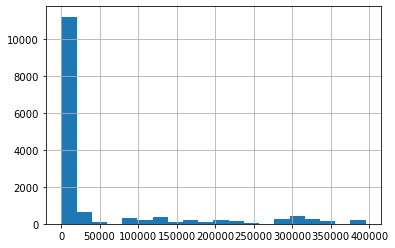

In [376]:
existing_new.cc_cons.hist(bins=20)

In [377]:
import seaborn as sns

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

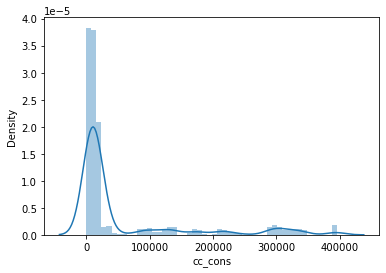

In [378]:
sns.distplot(existing_new.cc_cons)

In [382]:
#Now we need to check linearity--Linear relationship between Y and X.
corr_y=existing_new.corrwith(existing_new.cc_cons)
corr_y

account_type                   -0.002845
gender                          0.002322
age                            -0.006184
Income                          0.006533
Emp_Tenure_Years               -0.009694
Tenure_with_Bank                0.011427
region_code                    -0.019269
NetBanking_Flag                 0.001632
Avg_days_between_transaction   -0.005324
cc_cons_apr                     0.006077
dc_cons_apr                     0.001473
cc_cons_may                     0.020469
cc_cons_jun                    -0.000248
dc_cons_jun                     0.000240
cc_count_apr                   -0.009690
cc_count_may                    0.016088
cc_count_jun                    0.002119
dc_count_apr                   -0.000495
dc_count_may                    0.008162
dc_count_jun                   -0.006128
card_lim                       -0.003386
investment_1                    0.004854
investment_2                    0.002768
investment_3                   -0.011506
investment_4    

In [383]:
existing_new.apply(lambda x:x.std()/x.mean()).sort_values(ascending=False)

investment_1                    3.519763
cc_count_apr                    2.348484
emi_active                      2.136520
investment_4                    2.013605
investment_3                    1.982864
cc_cons                         1.768518
dc_cons_jun                     1.544232
investment_2                    1.425184
credit_count_may                1.412437
dc_cons_apr                     1.370099
credit_count_jun                1.363663
cc_cons_may                     1.305451
cc_cons_jun                     1.246190
dc_count_may                    1.215642
cc_cons_apr                     1.213934
credit_amount_jun               1.180254
debit_amount_may                1.175245
debit_amount_apr                1.160878
Emp_Tenure_Years                1.155962
debit_amount_jun                1.129746
dc_count_apr                    1.112615
credit_count_apr                1.110592
debit_count_may                 0.988598
cc_count_may                    0.975160
dc_count_jun    

In [384]:
from sklearn.feature_selection import f_regression,RFE,SelectKBest

In [385]:
target = existing_new.cc_cons
features = existing_new[existing_new.columns.difference(["cc_cons"])]

In [386]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg_days_between_transaction  15000 non-null  float64
 1   Emp_Tenure_Years              15000 non-null  float64
 2   Income                        15000 non-null  int32  
 3   NetBanking_Flag               15000 non-null  int64  
 4   Tenure_with_Bank              15000 non-null  int64  
 5   account_type                  15000 non-null  int32  
 6   age                           15000 non-null  int64  
 7   card_lim                      15000 non-null  int64  
 8   cc_cons_apr                   15000 non-null  float64
 9   cc_cons_jun                   15000 non-null  float64
 10  cc_cons_may                   15000 non-null  float64
 11  cc_count_apr                  15000 non-null  float64
 12  cc_count_jun                  15000 non-null  int64  
 13 

In [423]:
f_values,p_values = f_regression(features,target)

In [424]:
f_values

array([4.25059464e-01, 1.40955350e+00, 6.40221605e-01, 3.99490770e-02,
       1.95872979e+00, 1.21425843e-01, 5.73585302e-01, 1.71925981e-01,
       5.53930424e-01, 9.22538627e-04, 6.28665705e+00, 1.40835976e+00,
       6.73687274e-02, 3.88298672e+00, 1.79719366e-01, 1.36785063e-01,
       3.84704702e-01, 2.67553518e+00, 3.25352002e-02, 8.60857920e-04,
       3.67387238e-03, 5.63233514e-01, 9.99140820e-01, 2.08732793e-02,
       2.59696424e-04, 1.16259802e-02, 2.67980648e-02, 4.20381101e-01,
       3.06615619e-03, 9.98872810e-01, 8.08689076e-02, 3.53371204e-01,
       1.14913901e-01, 1.98586426e+00, 2.02463997e-02, 5.57090919e+00])

In [425]:
p_values

array([0.5144332 , 0.23514933, 0.42364324, 0.84158289, 0.16166991,
       0.72749806, 0.44884962, 0.6784117 , 0.45672782, 0.97576973,
       0.01217551, 0.23534767, 0.79521072, 0.04879607, 0.6716206 ,
       0.71150347, 0.53510548, 0.10192205, 0.85686049, 0.97659351,
       0.95166864, 0.45297211, 0.31753462, 0.88512664, 0.98714278,
       0.91413687, 0.86996862, 0.51675687, 0.95584214, 0.31759953,
       0.77612726, 0.55221992, 0.73462236, 0.15879471, 0.88685298,
       0.018274  ])

In [426]:
#concatenate all the f values
f_reg_results = pd.concat([pd.Series(features.columns),pd.Series(f_values),pd.Series(p_values)],axis=1)
f_reg_results.columns =["Feature","f_value","p_value"]

In [427]:
ff_reg_results = f_reg_results.sort_values(by="p_value")
ff_reg_results.to_csv("f_values")

In [428]:
ff_reg_results.sort_values(by="p_value",ascending=False)

,Feature,f_value,p_value
24,debit_amount_jun,0.000260,0.987143
19,dc_cons_jun,0.000861,0.976594
9,cc_cons_jun,0.000923,0.975770
28,debit_count_may,0.003066,0.955842
20,dc_count_apr,0.003674,0.951669
25,debit_amount_may,0.011626,0.914137
34,investment_4,0.020246,0.886853
23,debit_amount_apr,0.020873,0.885127
26,debit_count_apr,0.026798,0.869969
18,dc_cons_apr,0.032535,0.856860


In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [430]:
#RFE
RFE_Model = RFE(estimator = LinearRegression(),n_features_to_select=10).fit(features,target)

In [431]:
RFE_Model.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False])

In [432]:
#False means that variable got dropped.
features.columns[RFE_Model.get_support()]

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income',
       'NetBanking_Flag', 'Tenure_with_Bank', 'account_type', 'cc_count_may',
       'credit_count_may', 'dc_count_may', 'gender'],
      dtype='object')

In [433]:
RFE_Model = RFE(estimator = RandomForestRegressor(),n_features_to_select=10).fit(features,target)

In [ ]:
RFE_Model.get_support()

In [ ]:
features.columns[RFE_Model.get_support()]

In [434]:
RFE_Model.ranking_
#1 is top 5

array([20,  4, 24, 25, 23, 26, 16,  5,  1,  1,  1, 15, 11, 12,  1, 22, 14,
       19,  1,  1, 21, 17, 18,  1,  1,  1, 10,  9, 13,  1, 27,  3,  2,  6,
        7,  8])

In [435]:
rfe_ranking = pd.concat([pd.Series(features.columns), pd.Series(RFE_Model.ranking_)],axis=1)
rfe_ranking.columns = ["feature","rank"]

In [436]:
rfe_ranking.sort_values(by='rank')
# rank 2 is recently dropped and so on...

,feature,rank
8,cc_cons_apr,1
29,emi_active,1
24,debit_amount_jun,1
18,dc_cons_apr,1
9,cc_cons_jun,1
10,cc_cons_may,1
23,debit_amount_apr,1
19,dc_cons_jun,1
25,debit_amount_may,1
14,credit_amount_jun,1


In [476]:
final_list = [
 # 'cc_cons_apr',
 #   'credit_amount_jun',
    'emi_active',
 #   'debit_amount_may',
 #   'dc_cons_apr',
 #   'cc_cons_jun',
    'cc_cons_may',
 #   'debit_amount_jun',
 #   'debit_amount_apr',
  # 'dc_cons_jun',
  #  'Avg_days_between_transaction',
 #   'Emp_Tenure_Years',
 #   'Income',
 #   'NetBanking_Flag',
    'Tenure_with_Bank',
  #  'account_type',
  #  'gender',
    'cc_count_may',
    'credit_count_may',
 #   'dc_count_may'
    
    
    
    
]

In [477]:
features[final_list]

,emi_active,cc_cons_may,Tenure_with_Bank,cc_count_may,credit_count_may
111,1674.09,10288.00,1,26,2
112,13043.34,20672.00,6,7,2
113,25375.27,1964.50,1,32,2
114,3544.33,12609.88,6,1,23
115,12780.44,4364.00,4,47,24
...,...,...,...,...,...
15106,78966.76,7252.24,9,36,1
15107,4762.10,16025.50,9,34,4
15108,2877.33,19360.26,9,23,43
15109,13006.84,44341.13,10,128,3


In [478]:
#for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [479]:
vif_values=pd.concat([pd.Series(final_list),pd.Series([variance_inflation_factor(features[final_list].values, i) for i in range(len(final_list))])],axis=1)
vif_values

,0,1
0,emi_active,1.176593
1,cc_cons_may,1.469862
2,Tenure_with_Bank,2.231214
3,cc_count_may,1.740389
4,credit_count_may,1.393808


In [480]:
vif_values.columns =["features","VIF"]
vif_values.sort_values(by="VIF",ascending=False)

,features,VIF
2,Tenure_with_Bank,2.231214
3,cc_count_may,1.740389
1,cc_cons_may,1.469862
4,credit_count_may,1.393808
0,emi_active,1.176593


In [481]:
from sklearn.model_selection import train_test_split

In [482]:
existing_new_1= existing_new[final_list+["cc_cons"]]

In [483]:
train,test = train_test_split(existing_new_1,test_size = 0.3,random_state = 123)

In [484]:
formula = "cc_cons~"+'+'.join(train.columns.difference(['cc_cons']))

In [485]:
formula

'cc_cons~Tenure_with_Bank+cc_cons_may+cc_count_may+credit_count_may+emi_active'

In [486]:
import statsmodels.formula.api as smf

In [487]:
ols_model = smf.ols(formula , data = train).fit()

In [488]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.829
Date:                Sun, 02 Jan 2022   Prob (F-statistic):             0.0148
Time:                        19:45:48   Log-Likelihood:            -1.3548e+05
No. Observations:               10500   AIC:                         2.710e+05
Df Residuals:                   10494   BIC:                         2.710e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.788e+04   2514.736  

In [489]:
#even after removing all the constant,unique,high corelation and skewed values thr model accuracy is not good and we can thus 
# infer the root cause of this as the data we have.

In [ ]:
## actual predicted interest rate will be
train_pred = (ols_model.predict(train))
test_pred  = (ols_model.predict(test))
train_act = (train.cc_cons)
test_act = (test.cc_cons)

In [295]:

print('train MAPE:',np.mean(np.abs(train_act - train_pred)/train_act))
#this MAPE value means -expect approx 14 to 15 percent error in the model

train MAPE: 10.45294299054123


In [296]:
train['cc_cons_actual'] = train_act
train['cc_cons_pred'] = train_pred

<ipython-input-296-efa7f72f249b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cc_cons_actual'] = train_act
<ipython-input-296-efa7f72f249b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cc_cons_pred'] = train_pred


In [297]:
train

,emi_active,credit_count_may,cc_cons,cc_cons_actual,cc_cons_pred
5353,1544.12,10,5463.0,5463.0,54000.938180
12786,6353.09,5,638.0,638.0,53954.843943
7035,85.23,3,10846.0,10846.0,53200.537076
12707,57828.93,1,711.0,711.0,58196.634006
12680,1647.03,43,19851.0,19851.0,57165.659117
...,...,...,...,...,...
5329,6852.63,2,299396.0,299396.0,53712.858069
12363,2252.52,2,180578.0,180578.0,53299.612555
1457,10815.90,35,5228.0,5228.0,57224.369942
11757,4943.44,2,339590.0,339590.0,53541.348213


In [298]:
print('train RMSE:' ,np.sqrt(np.mean((train_act - train_pred)**2)))

train RMSE: 97186.3492561062


In [299]:
print('test RMSE:' ,np.sqrt(np.mean((test_act - test_pred)**2)))

test RMSE: 97967.58922814277


In [300]:
# calculate corelation between actual and predicted
np.corrcoef(train_act,train_pred)[1][0]

0.02616502218251004

In [301]:
np.corrcoef(test_act,test_pred)[1][0]

-0.012001586242278862

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

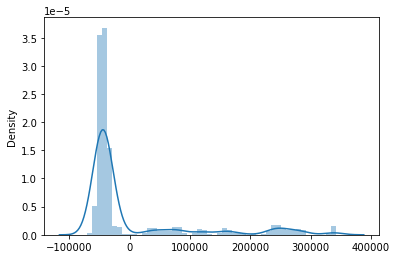

In [302]:
# to see errors
ols_model.resid
sns.distplot(ols_model.resid)
#residual should follow normal distribution
#imp to check if errors follows normal distribution or not to cross check

In [409]:
X = existing_new.drop(['cc_cons'],1)
y = existing_new['cc_cons']

In [410]:
#splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#Linear regression

In [411]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression


In [412]:
columns = X.columns
from sklearn.preprocessing import  MinMaxScaler
scaler =  MinMaxScaler()
X[columns] = scaler.fit_transform(X[columns])

In [413]:
y_train = np.log(y_train)

In [414]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [415]:
y_pred = lr.predict(X_test)

In [417]:
y_pred = np.exp(y_pred)

In [418]:
y_pred

array([15425.62175846, 15305.60588008, 14129.12868161, ...,
       15757.19119257, 14465.6430389 , 14875.886658  ])

In [420]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score

In [421]:
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score: ",r2_score(y_test,y_pred))

Test RMSLE: 1.5693707537101764
Test RMSE: 104699.9910342178
R2_score:  -0.159272601202614


In [422]:
print("Prediction for 10 observation:    ",y_pred[0:10])
print("Actual values for 10 observation: ",y_test[0:10].values)

Prediction for 10 observation:     [15425.62175846 15305.60588008 14129.12868161 14480.77623256
 18709.3518818  15598.65360121 14829.58568235 16053.78307835
 20939.06932447 14891.43480218]
Actual values for 10 observation:  [10304. 13129. 96347. 15331.  1592. 34871.  6484. 14165. 28326. 11077.]
